In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

column_names = ["Type", "Capacity", "Fill", "Time", "Num Insertions"]
df = pd.DataFrame(columns=column_names)


# Parse and store the data from each file
for i in range(1, 6):
    file_path = f"../data/murmur3/polaris/fixed_run/data{i}.txt"
    with open(file_path, 'r') as file:
        for line in file:
            # parse_line(line)
            parts = line.strip().split()

            type = parts[0]
            capacity = int(parts[2])
            fill = int(parts[4])
            time = float(parts[6])
            num_insertions = int(parts[8])
            new_row = {"Type" : type, "Capacity" : capacity, "Fill" : fill, "Time" : time, "Num Insertions" : num_insertions}

            # df = df.append(new_row, ignore_index=True)
            df = pd.concat([df, pd.DataFrame.from_records([new_row])])
            


          
insertion_data = df[df["Type"] == "I"]
find_data = df[df["Type"] == "FT"]
single_data = df[df["Type"] == "SI"]
multiple_data = df[df["Type"] == "MI"]


/tmp/ipykernel_4067/2206456513.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([new_row])])


/tmp/ipykernel_4067/3319268354.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data["Time"] *= 1000


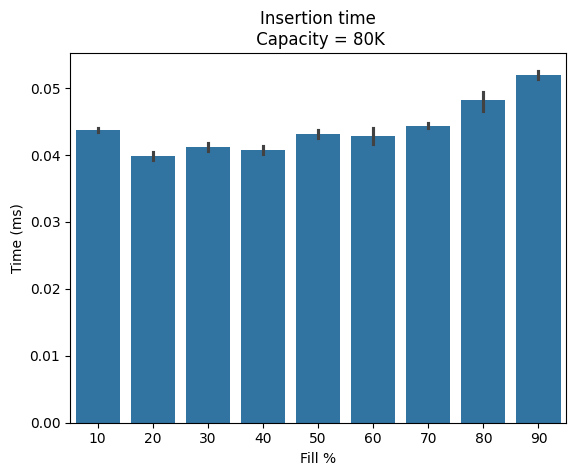

/tmp/ipykernel_4067/3319268354.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data["Time"] *= 1000


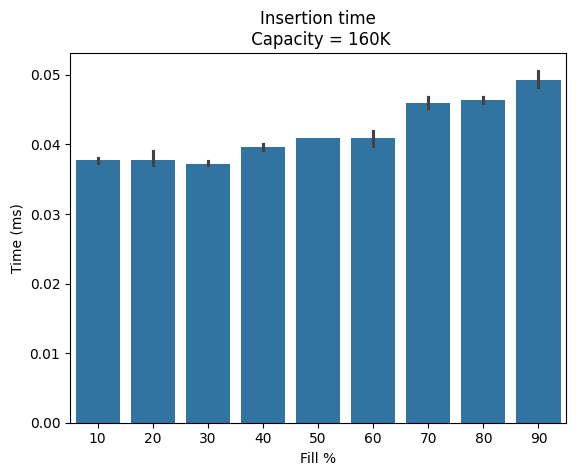

/tmp/ipykernel_4067/3319268354.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data["Time"] *= 1000


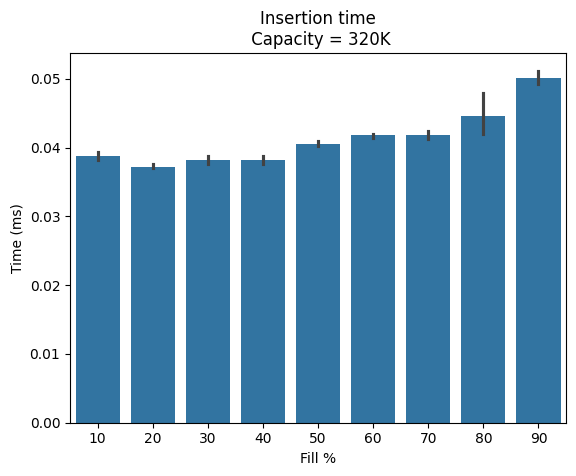

/tmp/ipykernel_4067/3319268354.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data["Time"] *= 1000


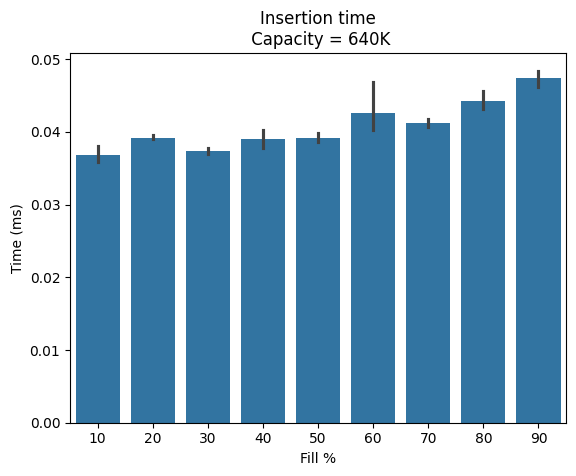

/tmp/ipykernel_4067/3319268354.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data["Time"] *= 1000


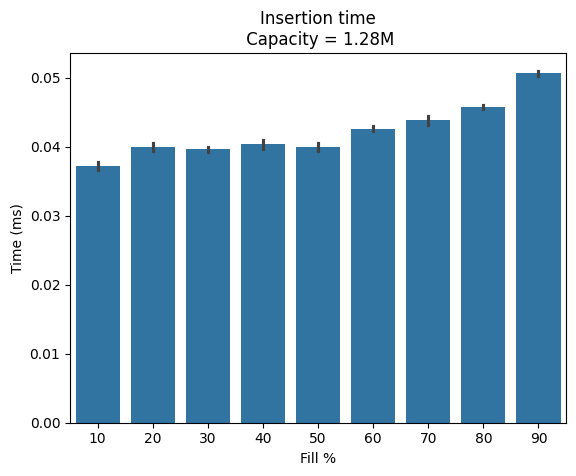

/tmp/ipykernel_4067/3319268354.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data["Time"] *= 1000


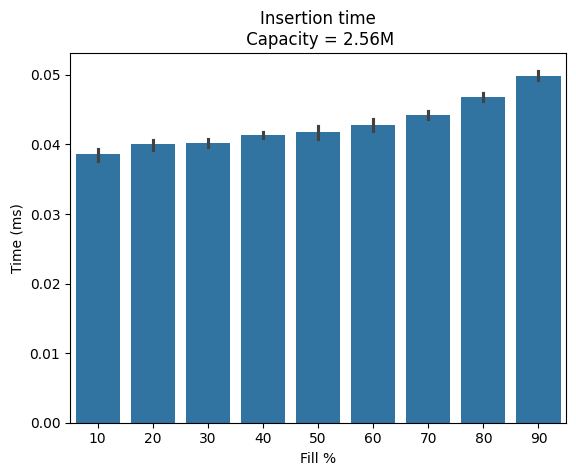

/tmp/ipykernel_4067/3319268354.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data["Time"] *= 1000


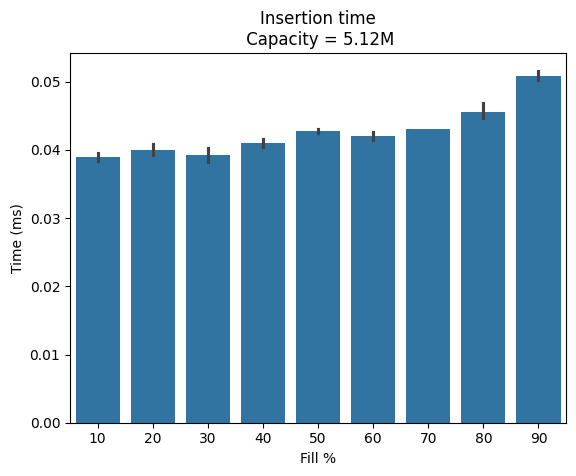

/tmp/ipykernel_4067/3319268354.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data["Time"] *= 1000


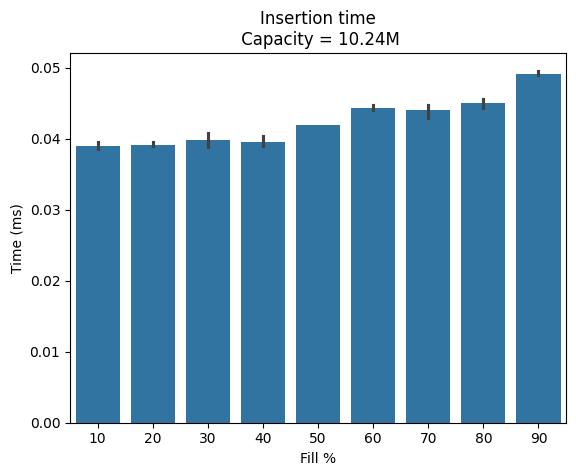

/tmp/ipykernel_4067/3319268354.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data["Time"] *= 1000


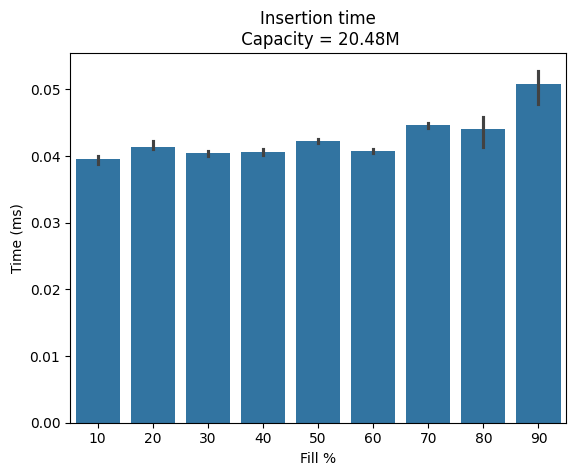

/tmp/ipykernel_4067/3319268354.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data["Time"] *= 1000


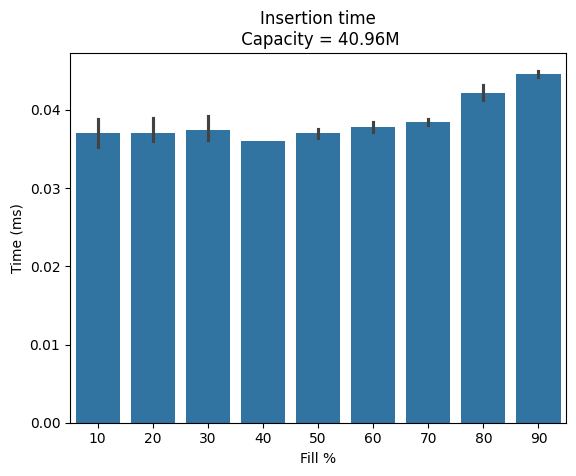

/tmp/ipykernel_4067/3319268354.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data["Time"] *= 1000


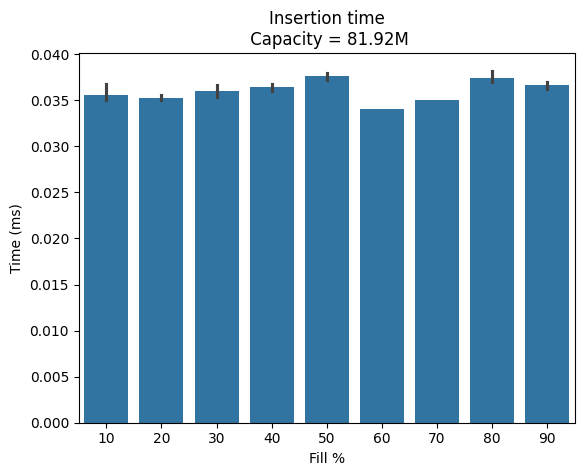

In [64]:
from scipy.stats import sem, t
import seaborn as sns
import matplotlib as mpl

def confidence_interval(data):
    confidence = 0.95  # You can adjust the confidence level as needed
    n = len(data)
    mean_value = np.mean(data)
    margin_error = sem(data) * t.ppf((1 + confidence) / 2, n - 1)
    return mean_value - margin_error, mean_value + margin_error

#Graphs of different capacities and they insertion times over different fills
capacity = 80000
for i in range(1, 12):
    rel_data = insertion_data[insertion_data["Capacity"] == capacity]
    rel_data["Time"] *= 1000
    ax = sns.barplot(data=rel_data, x='Fill', y='Time')
    ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter(useOffset=False))
    ax.set_ylim(bottom=0)
   
    ax.set_xlabel("Fill %")
    ax.set_ylabel("Time (ms)")
    if(capacity < 1000000):
        ax.set_title(f"Insertion time\n Capacity = {int(capacity/1000)}K")
    else:
        ax.set_title(f"Insertion time\n Capacity = {capacity/1000000}M")
    plt.show() 
    # condensed_average = rel_data.groupby('Fill').agg({'Type': 'first', 'Capacity': 'first', 'Time': 'mean', 'Num Insertions': 'first'}).reset_index()
    # # conf_int = rel_data.groupby('Fill').agg({'Type': 'first', 'Capacity': 'first', 'Time': 'std', 'Num Insertions': 'first'}).reset_index()

    # x = condensed_average["Fill"]
    # y = np.array(condensed_average["Time"]) * 1000

    # print(np.array(conf_int["Time"]))

    # plt.bar(x, y, width=5)

    # # plt.errorbar(x, y, yerr=np.array(conf_int["Time"]))
    # # plt.yscale('log')

    # plt.xlabel("Fill %")
    # plt.ylabel("Time (ms)")
    # if(capacity < 1000000):
    #     plt.title(f"Insertion time\n Capacity = {int(capacity/1000)}K")
    # else:
    #     plt.title(f"Insertion time\n Capacity = {capacity/1000000}M")
    # plt.show()
    # display(rel_data)
    # breaa
    capacity = capacity * 2

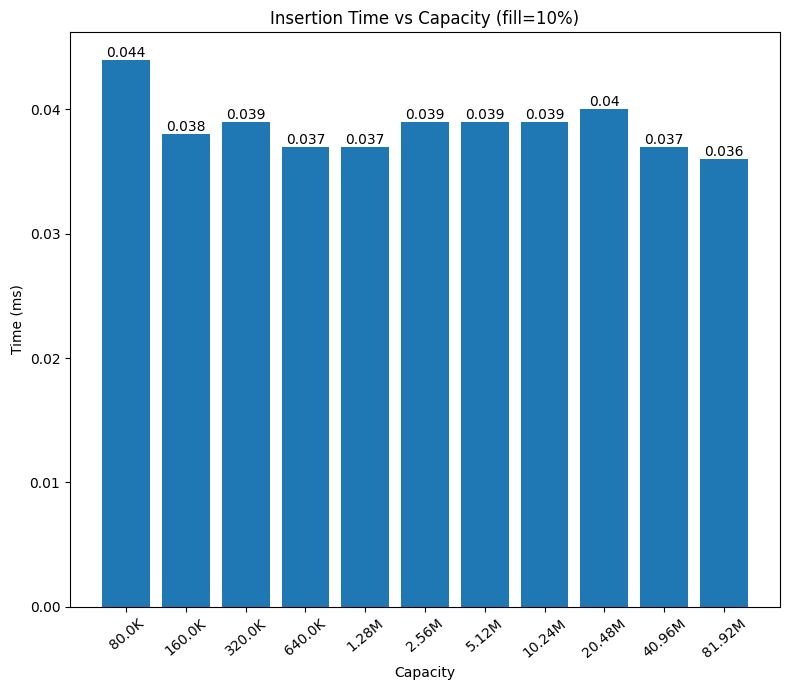

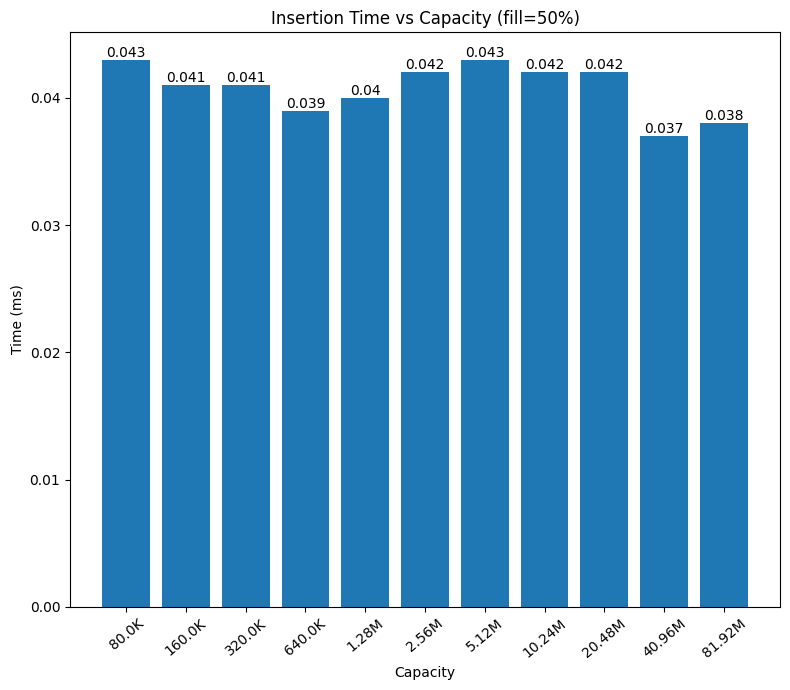

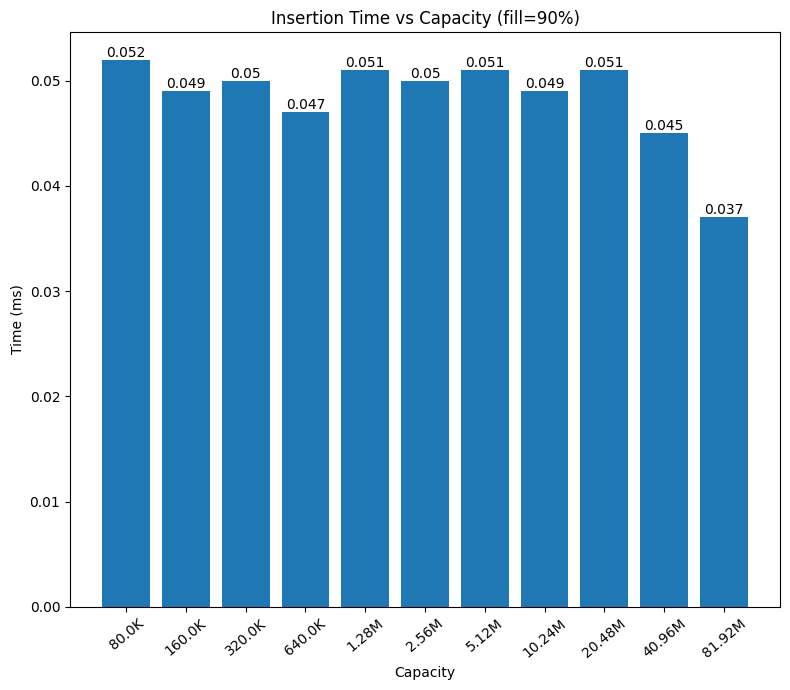

In [9]:
#Average insertion time over capacity at different fills
x = []
capacity = 80000
for i in range(1, 12):
    if(capacity < 1000000):
        x.append(f"{capacity/1000}K")
    else:
        x.append(f"{capacity/1000000}M")

    capacity = capacity * 2
# x = [f"{i}" for i in range(15)]

for j in range(3):
    y = []
    fill = [10, 50, 90]
    capacity = 80000
    for i in range(1, 12):
        rel_data = insertion_data[insertion_data["Capacity"] == capacity]
        # condensed_average = rel_data.groupby('Fill').agg({'Type': 'first', 'Capacity': 'first', 'Time': 'mean', 'Num Insertions': 'first'}).reset_index()
        condensed_average = rel_data[rel_data["Fill"] == fill[j]]["Time"]
        condensed_average = condensed_average[0]
        # print(condensed_average)
        
        #Is this wise? Speak with Nigel
        res = np.array(condensed_average) * 1000
        res = np.average(res)

        y.append(res)

        capacity = capacity * 2

    y = np.round(y, 3)
    # print(y)

    plt.figure(figsize=(8, 7))  #
    plt.bar(x, y)

    for i in range(len(x)):
        plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')

    # plt.yscale('log')
    plt.xlabel("Capacity")
    plt.ylabel("Time (ms)")
    plt.xticks(rotation=40)
    plt.title(f"Insertion Time vs Capacity (fill={fill[j]}%)")
    plt.tight_layout()
    plt.show()



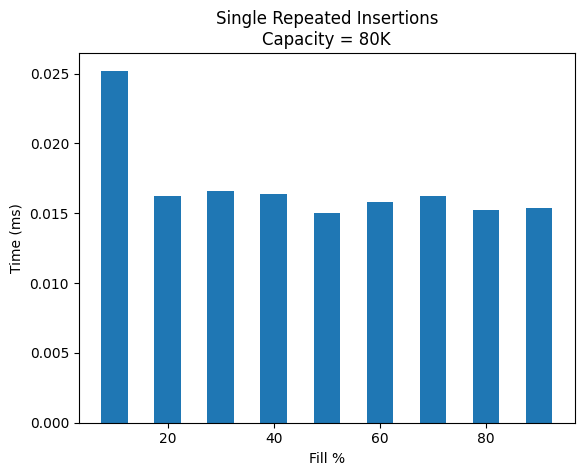

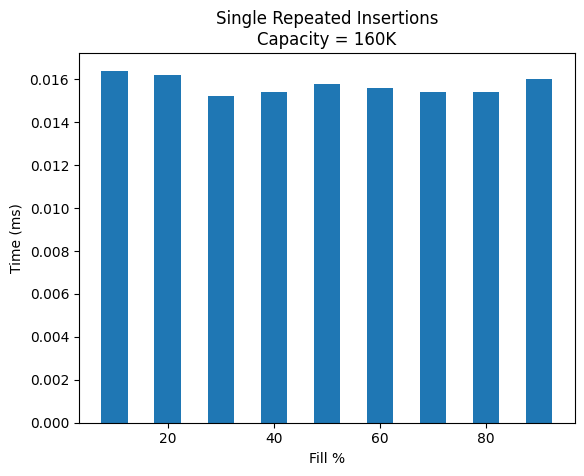

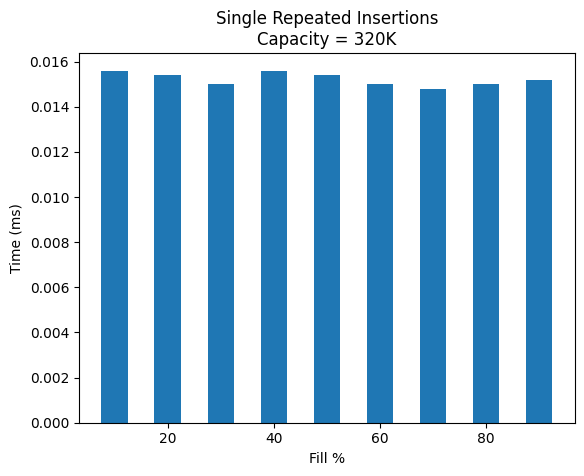

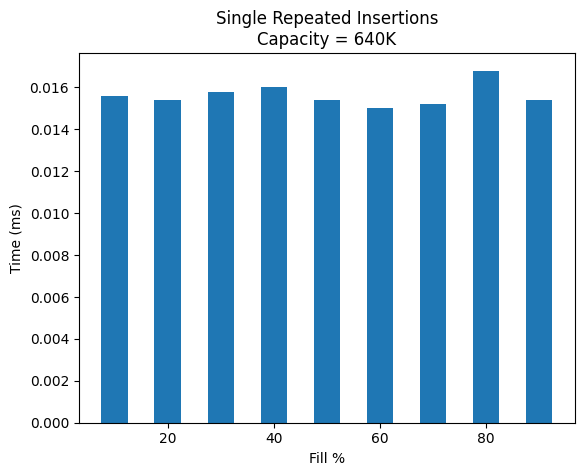

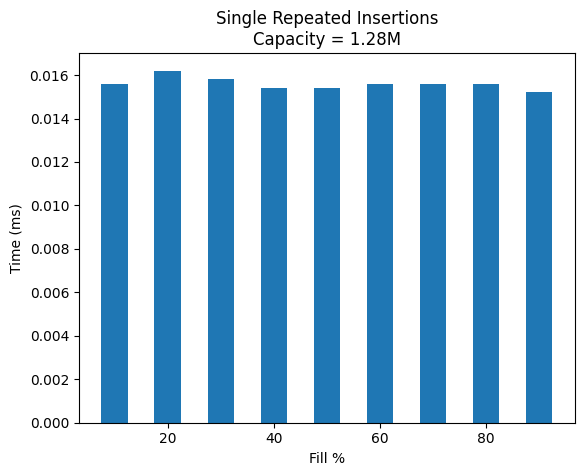

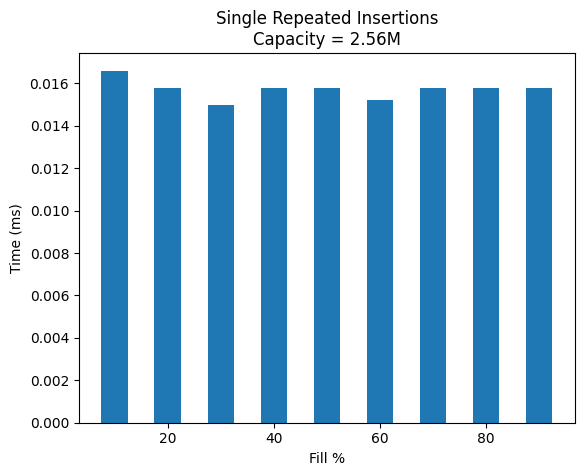

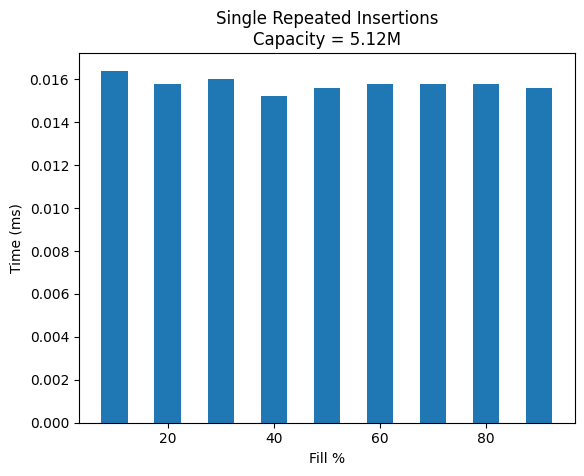

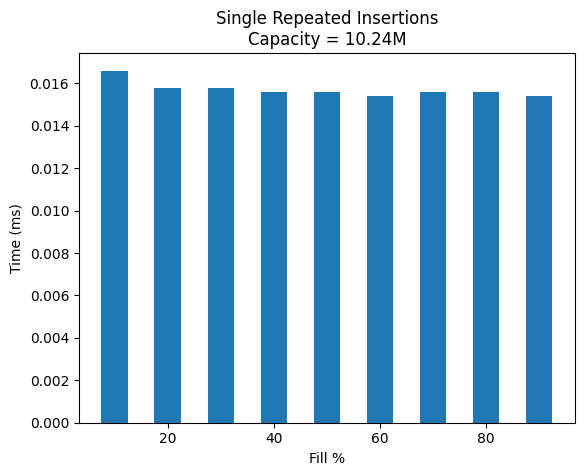

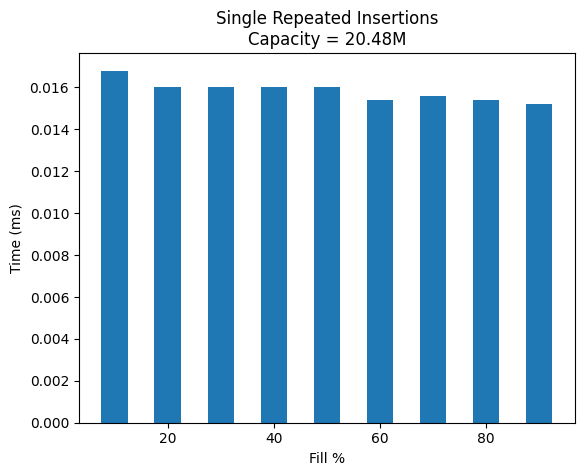

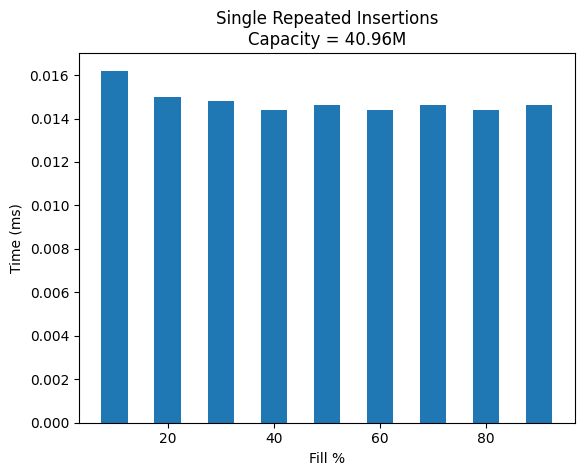

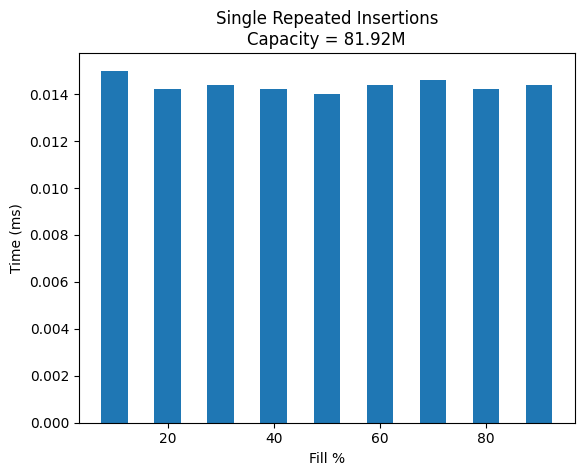

In [15]:
#Graphs of different capacities and they insertion times over different fills
capacity = 80000
for i in range(1, 12):
    rel_data = single_data[single_data["Capacity"] == capacity]
    condensed_average = rel_data.groupby('Fill').agg({'Type': 'first', 'Capacity': 'first', 'Time': 'mean', 'Num Insertions': 'first'}).reset_index()

    x = condensed_average["Fill"]
    # x = [f"10000*2^{i}" for i in range(15)]
    y = np.array(condensed_average["Time"]) * 1000

    plt.bar(x, y, width=5)
    # plt.yscale('log')
    plt.xlabel("Fill %")
    plt.ylabel("Time (ms)")
    if(capacity < 1000000):
        plt.title(f"Single Repeated Insertions\nCapacity = {int(capacity/1000)}K")
    else:
        plt.title(f"Single Repeated Insertions\nCapacity = {(capacity/1000000)}M")
    plt.show()
    capacity = capacity * 2

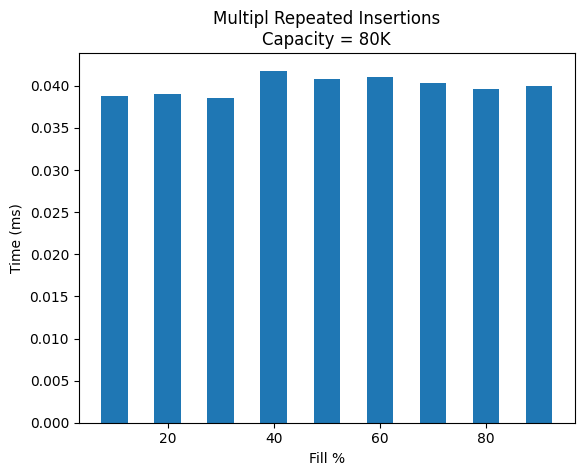

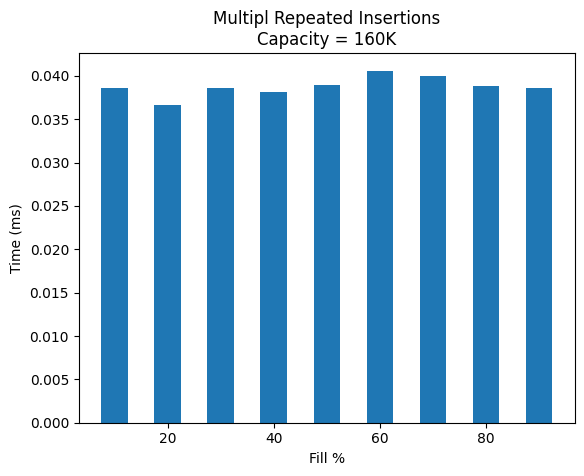

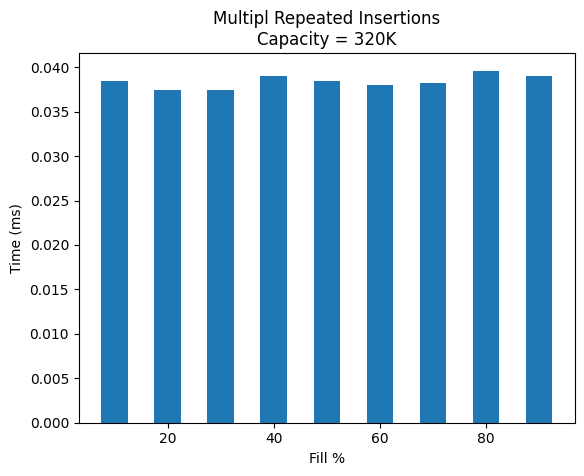

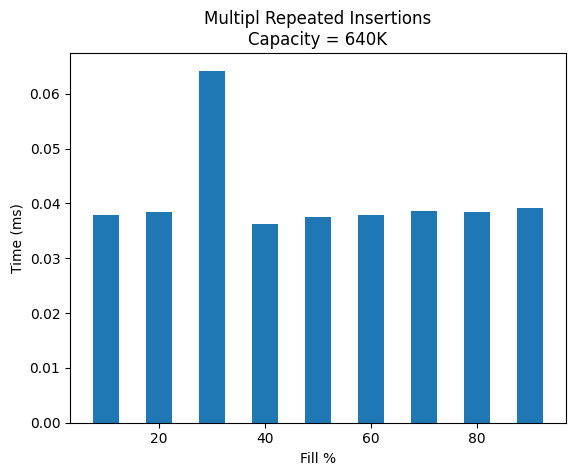

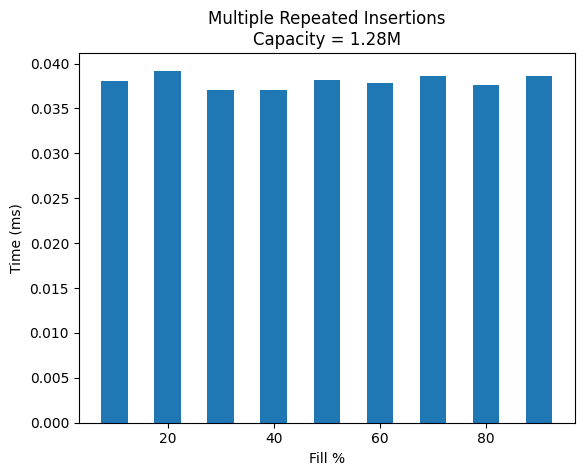

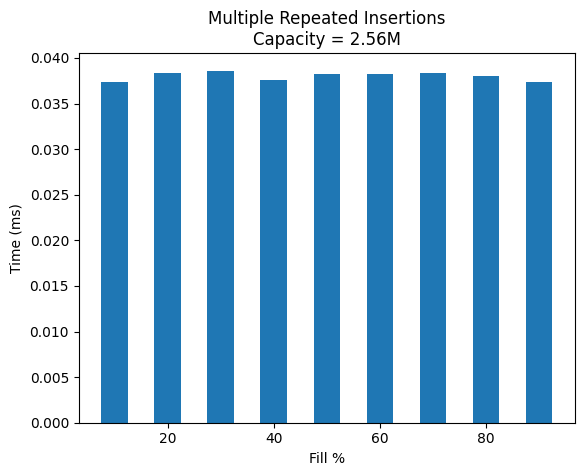

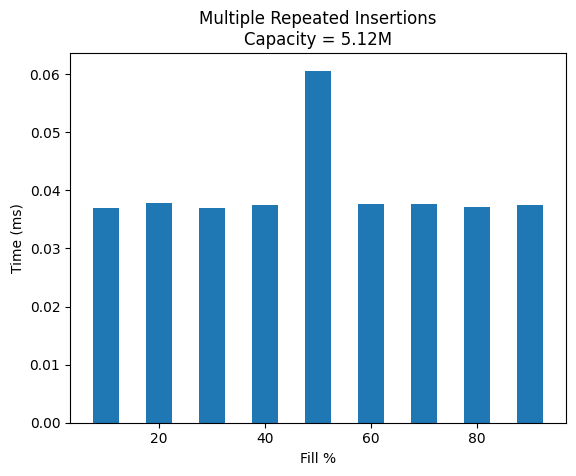

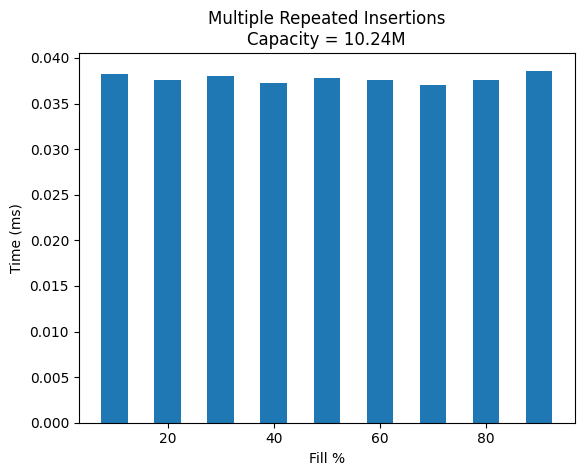

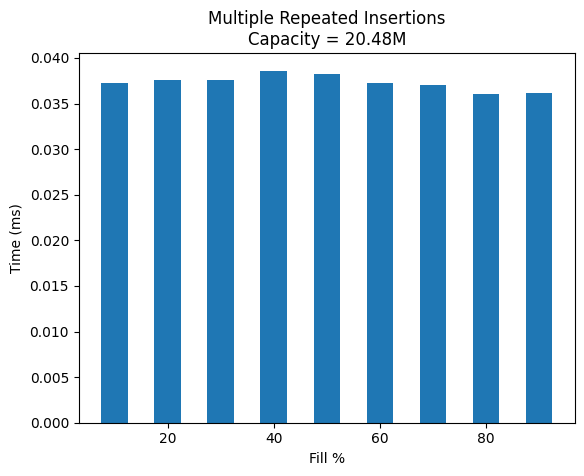

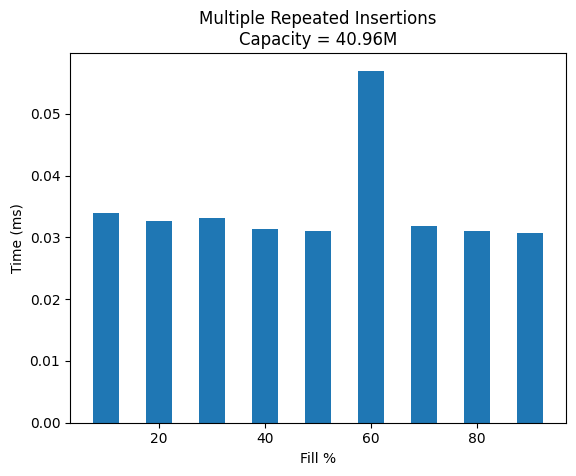

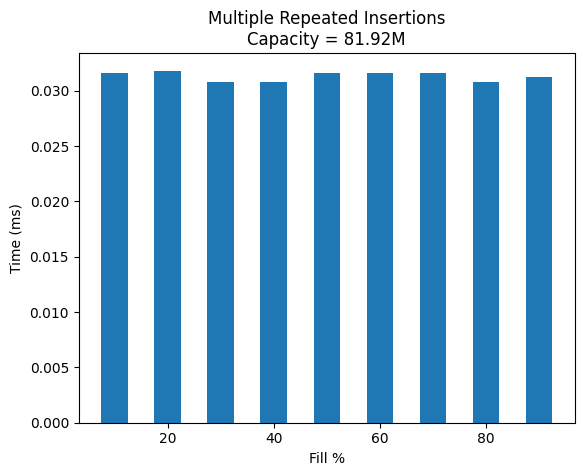

In [13]:
#Graphs of different capacities and they insertion times over different fills
capacity = 80000
for i in range(1, 12):
    rel_data = multiple_data[multiple_data["Capacity"] == capacity]
    condensed_average = rel_data.groupby('Fill').agg({'Type': 'first', 'Capacity': 'first', 'Time': 'mean', 'Num Insertions': 'first'}).reset_index()

    x = condensed_average["Fill"]
    # x = [f"10000*2^{i}" for i in range(15)]
    y = np.array(condensed_average["Time"]) * 1000

    plt.bar(x, y, width=5)
    # plt.yscale('log')
    plt.xlabel("Fill %")
    plt.ylabel("Time (ms)")
    if(capacity < 1000000):
        plt.title(f"Multipl Repeated Insertions\nCapacity = {int(capacity/1000)}K")
    else:
        plt.title(f"Multiple Repeated Insertions\nCapacity = {(capacity/1000000)}M")
    plt.show()
    capacity = capacity * 2
#7k in 80k cap var
#average ins find timat at some percentage how at different perc it vairs

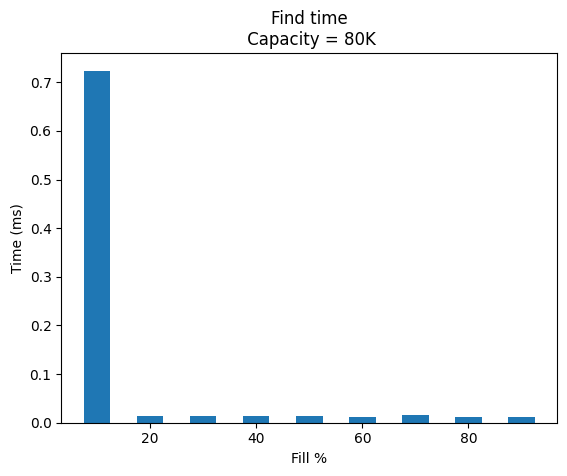

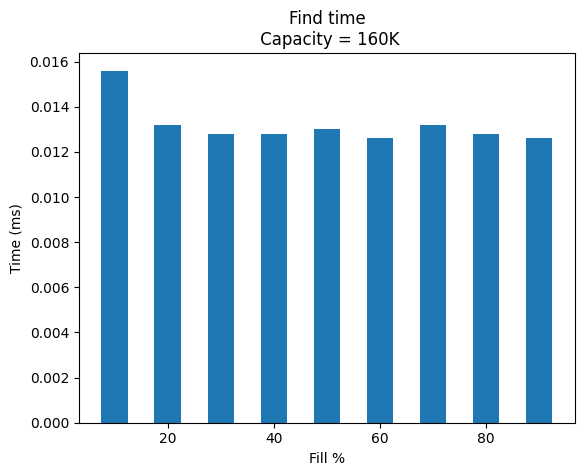

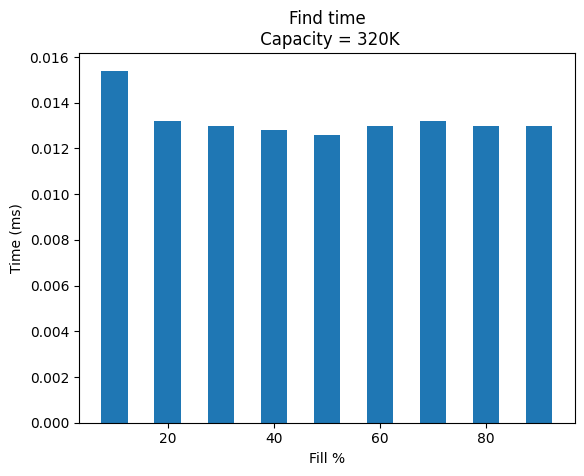

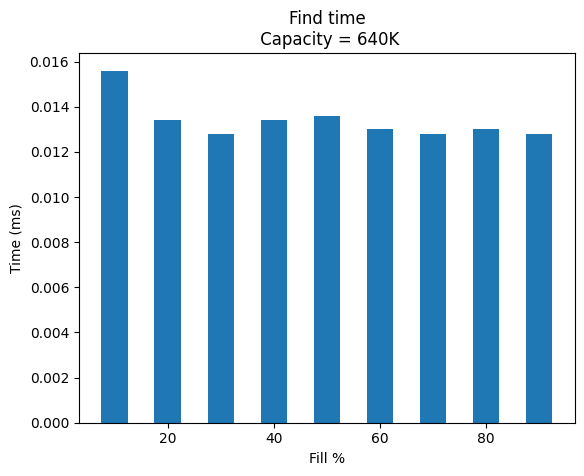

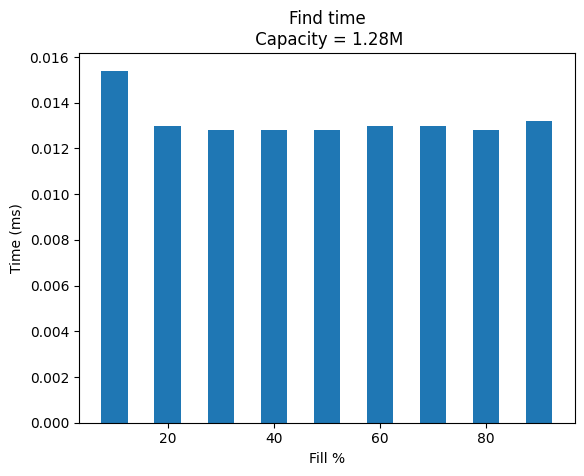

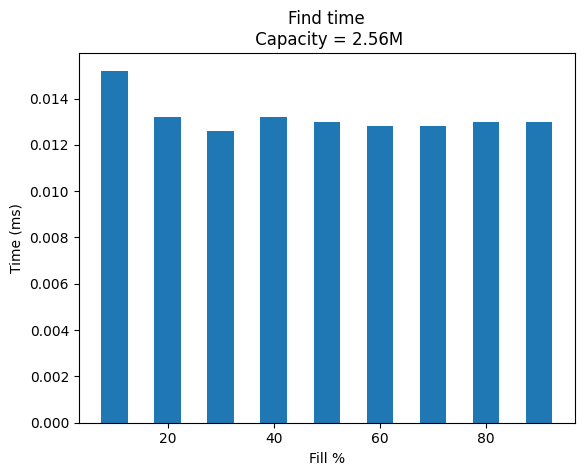

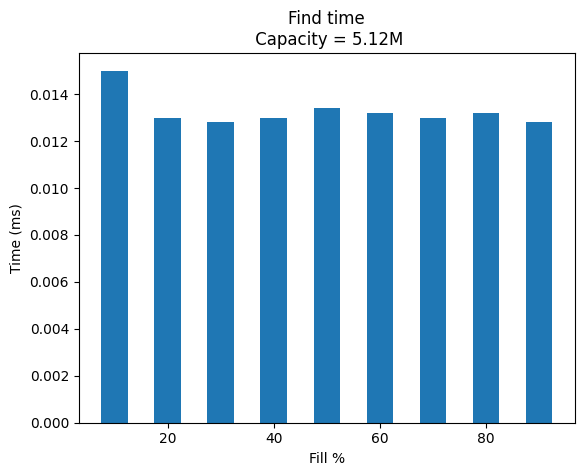

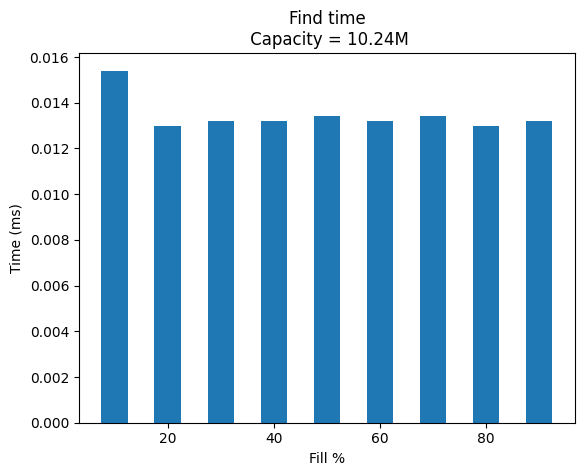

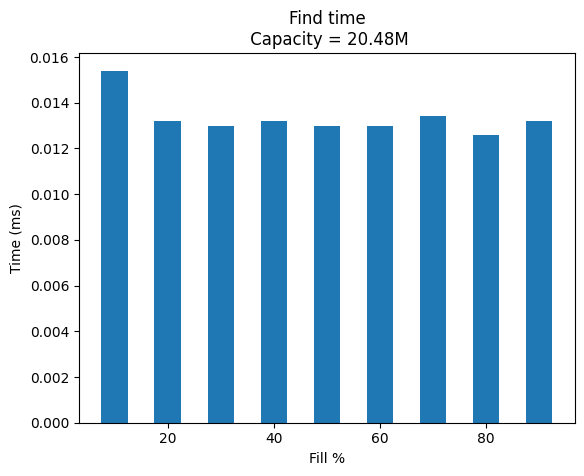

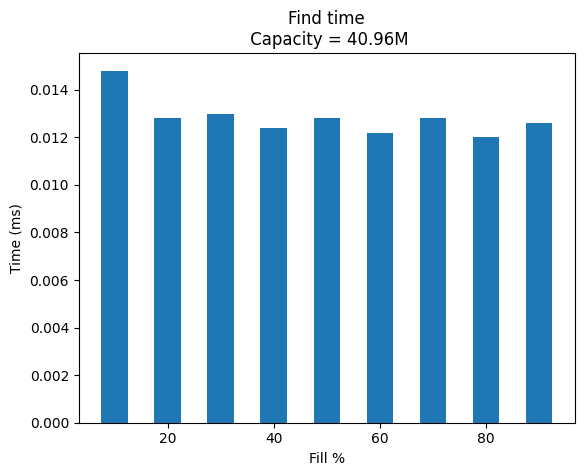

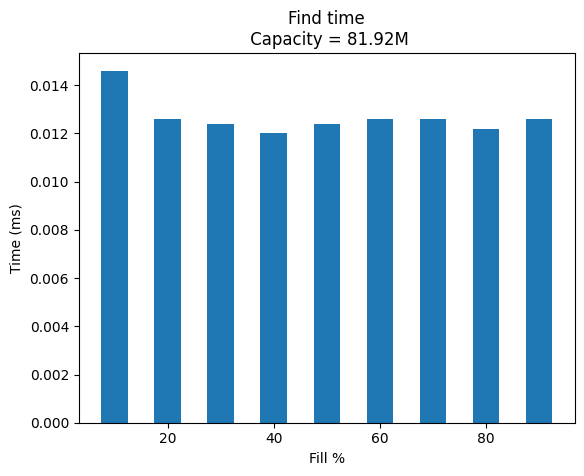

In [14]:
capacity = 80000
for i in range(1, 12):
    rel_data = find_data[find_data["Capacity"] == capacity]
    condensed_average = rel_data.groupby('Fill').agg({'Type': 'first', 'Capacity': 'first', 'Time': 'mean', 'Num Insertions': 'first'}).reset_index()

    x = condensed_average["Fill"]
    # x = [f"10000*2^{i}" for i in range(15)]
    y = np.array(condensed_average["Time"]) * 1000

    plt.bar(x, y, width=5)
    # plt.yscale('log')
    plt.xlabel("Fill %")
    plt.ylabel("Time (ms)")
    if(capacity < 1000000):
        plt.title(f"Find time\n Capacity = {int(capacity/1000)}K")
    else:
        plt.title(f"Find time\n Capacity = {capacity/1000000}M")
    plt.show()
    capacity = capacity * 2